# Double 7's Portfolio (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average or X-day ma
    2. The SPY closes at a 7-day low, buy.
    3. If the SPY closes at a 7-day high, sell your long position.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbols = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
#symbols = ['IWB', 'SPY', 'VGK', 'IEV', 'EWJ', 'EPP', 'IEF', 'SHY', 'GLD']
#symbols = ['FB', 'AMZN', 'NFLX', 'GOOG']
symbols = ['SPY', 'QQQ', 'TLT', 'GLD']
#symbols = ['SPY']

capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()
#end = datetime.datetime(2019, 1, 1)
# num months lookback
period = 7

use_cache = False
use_regime_filter = True
use_vola_weight = True

Run Strategy

In [4]:
s = strategy.Strategy(symbols, capital, start, end, stop_loss_pct=85, margin=3, period=period,
                      use_cache=use_cache, use_regime_filter=use_regime_filter,
                      use_vola_weight=use_vola_weight)
s.run()

STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!


Retrieve log DataFrames

In [5]:
rlog, tlog, dbal = s.get_logs()
stats = s.get_stats()

In [6]:
rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2005-09-07,0,57.49,157,entry,LONG,TLT
1,2005-09-14,1,91.00,84,entry,LONG,SPY
2,2005-09-14,2,34.54,219,entry,LONG,QQQ
3,2005-09-29,3,90.98,84,exit,LONG,SPY
4,2005-09-29,4,34.55,219,exit,LONG,QQQ


In [7]:
tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
569,2020-07-16,168.73,2020-07-20,170.94,2.21,1597.83,723,95038.83,LONG,GLD
570,2020-07-23,258.01,2020-07-31,265.79,7.78,1291.48,166,96330.31,LONG,QQQ
571,2020-08-07,169.88,2020-08-21,166.20,-3.68,-2509.77,682,93820.54,LONG,TLT
572,2020-08-11,265.19,2020-08-17,275.32,10.13,1955.09,193,95775.63,LONG,QQQ
573,2020-08-11,179.94,2020-08-21,182.03,2.09,499.51,239,96275.14,LONG,GLD


In [8]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2020-08-17,105563.45,105563.45,105563.45,921,-50578.43,1.48,X
2020-08-18,106762.91,106762.91,106762.91,921,-50578.43,1.47,-
2020-08-19,104640.79,104640.79,104640.79,921,-50578.43,1.48,-
2020-08-20,105951.30,105951.30,105951.30,921,-50578.43,1.48,-
2020-08-21,106275.14,106275.14,106275.14,0,106275.14,1.00,X


Generate strategy stats - display all available stats

In [9]:
pf.print_full(stats)

start                                                    2005-09-02
end                                                      2020-08-21
beginning_balance                                             10000
ending_balance                                            106275.14
total_net_profit                                           96275.14
gross_profit                                              190359.36
gross_loss                                                -94084.22
profit_factor                                                  2.02
return_on_initial_capital                                    962.75
annual_return_rate                                            17.10
trading_period                           14 years 11 months 19 days
pct_time_in_market                                            69.96
margin                                                            3
avg_leverage                                                   1.30
max_leverage                                    

,cumul_total,weight,pct_cumul_total,relative_performance
SPY,"$26,882.55",0.25,0.28,1.12
QQQ,"$33,681.11",0.25,0.35,1.40
TLT,"$20,433.41",0.25,0.21,0.85
GLD,"$15,278.07",0.25,0.16,0.63
TOTAL,"$96,275.14",1.00,1.00,1.00


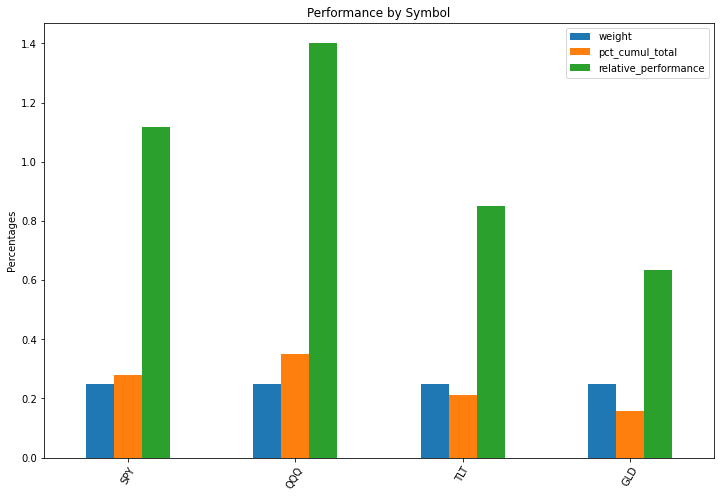

In [10]:
weights = {symbol: 1 / len(symbols) for symbol in symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,SPY,QQQ,TLT,GLD
SPY,1.00,0.99,0.88,0.40
QQQ,0.99,1.00,0.90,0.45
TLT,0.88,0.90,1.00,0.66
GLD,0.40,0.45,0.66,1.00


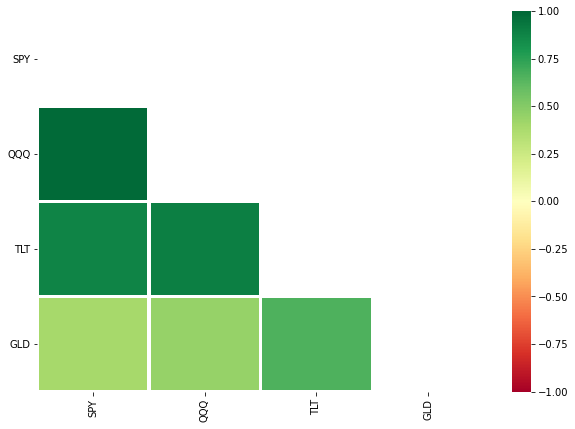

In [11]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark('SPY', capital, s.start, s.end, use_adj=True)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2005-09-02 00:00:00 BUY  110 SPY @ 90.30
2020-08-21 00:00:00 SELL 110 SPY @ 339.48


Plot Equity Curves: Strategy vs Benchmark

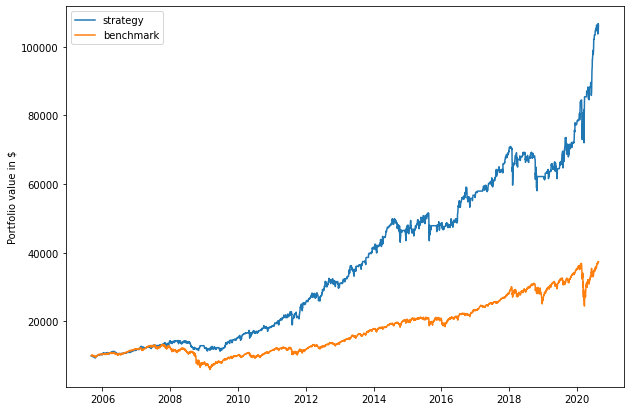

In [13]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,17.10,9.21
max_closed_out_drawdown,-21.70,-54.91
drawdown_annualized_return,-1.27,-5.96
drawdown_recovery,-1.24,-1.42
best_month,20.93,23.36
worst_month,-15.46,-30.93
sharpe_ratio,0.97,0.54
sortino_ratio,1.09,0.64
monthly_std,3.84,4.66
annual_std,14.88,15.88


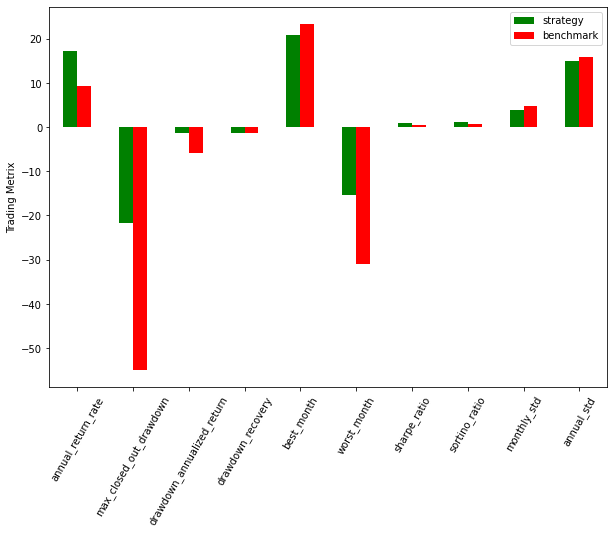

In [14]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [15]:
kelly = pf.kelly_criterian(stats, benchmark.stats)
kelly

sharpe_ratio            0.97
sharpe_ratio_max        1.03
sharpe_ratio_min        0.91
strategy risk           0.15
instrument risk         0.16
optimal target risk     0.97
half kelly criterian    0.48
aggressive leverage     6.10
moderate leverage       3.05
conservative leverage   2.87
dtype: float64